In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Social Adverts.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
# Label Encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [12]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
X.shape, y.shape

((400, 2), (400,))

In [13]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [14]:
y.tail()

395    1
396    1
397    1
398    0
399    1
Name: Purchased, dtype: int64

In [15]:

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.25)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [18]:
import warnings
warnings.filterwarnings("ignore")
X_scaler = StandardScaler()
train_x_scaled = X_scaler.fit_transform(train_x)
test_x_scaled = X_scaler.transform(test_x)

In [19]:
# Fitting Model
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(train_x_scaled, train_y)
y_predict = classifier.predict(test_x_scaled)

In [20]:
# Evaluate
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_y, y_predict))
print(classification_report(test_y, y_predict))

classifier.score(test_x_scaled, test_y)


[[56  9]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        65
           1       0.79      0.97      0.87        35

   micro avg       0.90      0.90      0.90       100
   macro avg       0.89      0.92      0.89       100
weighted avg       0.92      0.90      0.90       100



0.9

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


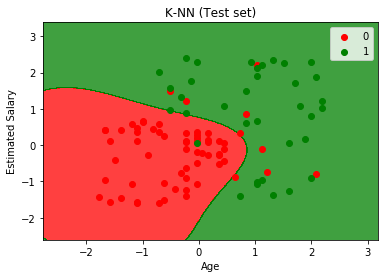

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap

X_set, y_set = test_x_scaled, test_y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()